In [ ]:
from google.colab import files
files.upload()

In [ ]:
!unzip Indian-monuments.zip

Archive:  Indian-monuments.zip
   creating: Indian-monuments/images/
   creating: Indian-monuments/images/test/
   creating: Indian-monuments/images/test/AIHOLE/
  inflating: Indian-monuments/images/test/AIHOLE/Aihole-1.jpg  
  inflating: Indian-monuments/images/test/AIHOLE/Aihole1-1.jpg  
  inflating: Indian-monuments/images/test/AIHOLE/Durga-Temple-Aihole-1.jpg  
  inflating: Indian-monuments/images/test/AIHOLE/Vastuchitra_Aihole_06-1.jpg  
  inflating: Indian-monuments/images/test/AIHOLE/Vastuchitra_Durga-Temple-Aihole-01-1.jpg  
  inflating: Indian-monuments/images/test/AIHOLE/Vastuchitra-Aihole_07-1.jpg  
  inflating: Indian-monuments/images/test/AIHOLE/Vastuchitra-Aihole-1-1.jpg  
  inflating: Indian-monuments/images/test/AIHOLE/Vastuchitra-Aihole-temple-1.jpg  
   creating: Indian-monuments/images/test/Ajanta Caves/
  inflating: Indian-monuments/images/test/Ajanta Caves/1.jpg  
  inflating: Indian-monuments/images/test/Ajanta Caves/10.jpg  
  inflating: Indian-monuments/images/t

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/Indian-monuments/images/train",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 3592 files belonging to 32 classes.


In [ ]:
class_names = dataset.class_names
class_names

['AIHOLE',
 'Ajanta Caves',
 'BADAMI',
 'Beluru',
 'Charar-E- Sharif',
 'Chhota_Imambara',
 'Ellora Caves',
 'Fatehpur Sikri',
 'Gateway of India',
 'Halebeedu',
 'Hampi',
 'Humayun_s Tomb',
 'Ibrahim Roza',
 'India gate pics',
 'Khajuraho',
 'Pattadakal',
 'Shri Murudeshwara Temple',
 'Sun Temple Konark',
 'alai_darwaza',
 'alai_minar',
 'basilica_of_bom_jesus',
 'charminar',
 'golden temple',
 'hawa mahal pics',
 'iron_pillar',
 'jamali_kamali_tomb',
 'lotus_temple',
 'mysore_palace',
 'qutub_minar',
 'tajmahal',
 'tanjavur temple',
 'victoria memorial']

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[21 23 22 31 23 28  4 26 28 29 22  8 24 28 28 25 24 31  4 26 29 23 30 24
 21 28 11 21 31 22  8  8]


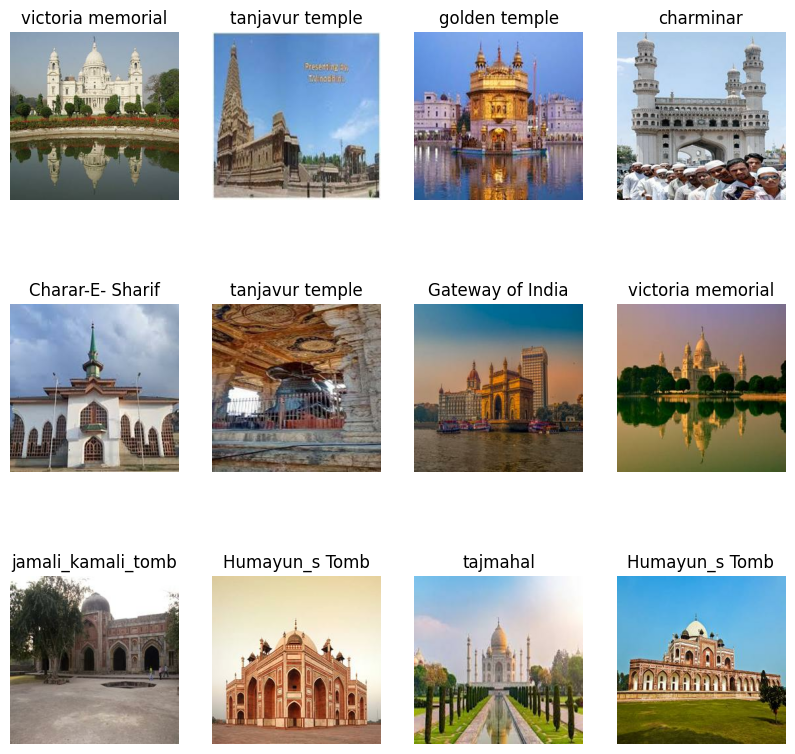

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
len(dataset)

113

In [ ]:
train_size = 0.8
len(dataset)*train_size

90.4

In [ ]:
train_ds = dataset.take(54)
len(train_ds)

54

In [ ]:
test_ds = dataset.skip(54)
len(test_ds)

59

In [ ]:
val_size=0.1
len(dataset)*val_size

11.3

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds = test_ds.skip(6)
len(test_ds)

53

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

90

In [ ]:
len(val_ds)

11

In [ ]:
len(test_ds)

12

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 32

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=1,
)

Epoch 1/50
90/90 [==============================] - 339s 4s/step - loss: 3.1649 - accuracy: 0.0973 - val_loss: 3.0789 - val_accuracy: 0.0938
Epoch 2/50
90/90 [==============================] - 327s 4s/step - loss: 2.9301 - accuracy: 0.1443 - val_loss: 2.7184 - val_accuracy: 0.2415
Epoch 3/50
90/90 [==============================] - 340s 4s/step - loss: 2.6033 - accuracy: 0.2553 - val_loss: 2.5172 - val_accuracy: 0.2642
Epoch 4/50
90/90 [==============================] - 339s 4s/step - loss: 2.3144 - accuracy: 0.3407 - val_loss: 2.0993 - val_accuracy: 0.3892
Epoch 5/50
90/90 [==============================] - 343s 4s/step - loss: 1.9899 - accuracy: 0.4268 - val_loss: 1.8558 - val_accuracy: 0.4744
Epoch 6/50
90/90 [==============================] - 329s 4s/step - loss: 1.7184 - accuracy: 0.5049 - val_loss: 1.5940 - val_accuracy: 0.5256
Epoch 7/50
90/90 [==============================] - 344s 4s/step - loss: 1.5164 - accuracy: 0.5546 - val_loss: 1.4831 - val_accuracy: 0.5909
Epoch 8/50
90

In [ ]:
scores = model.evaluate(test_ds)

12/12 [==============================] - 19s 1s/step - loss: 0.8867 - accuracy: 0.9167


In [ ]:
scores

[0.886712372303009, 0.9166666865348816]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 90}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

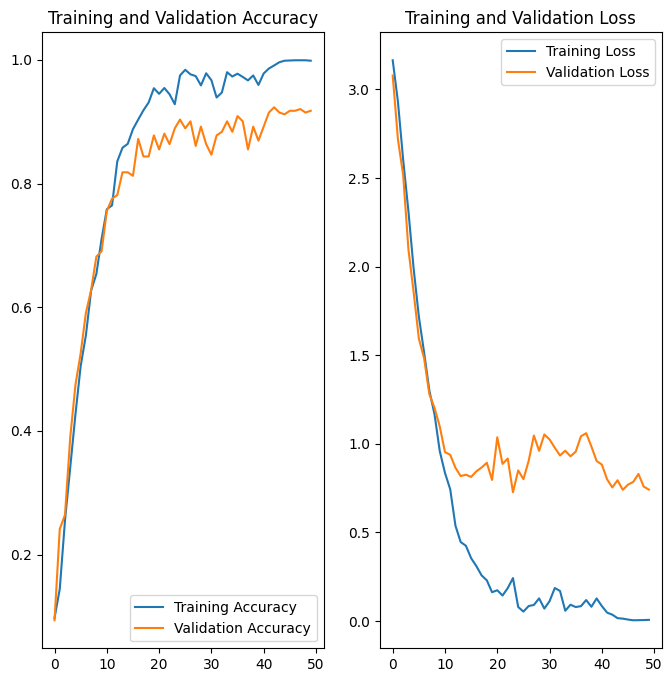

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: qutub_minar
1/1 [==============================] - 2s 2s/step
predicted label: qutub_minar


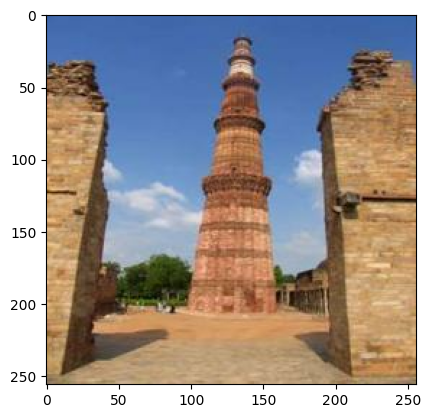

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 76ms/step


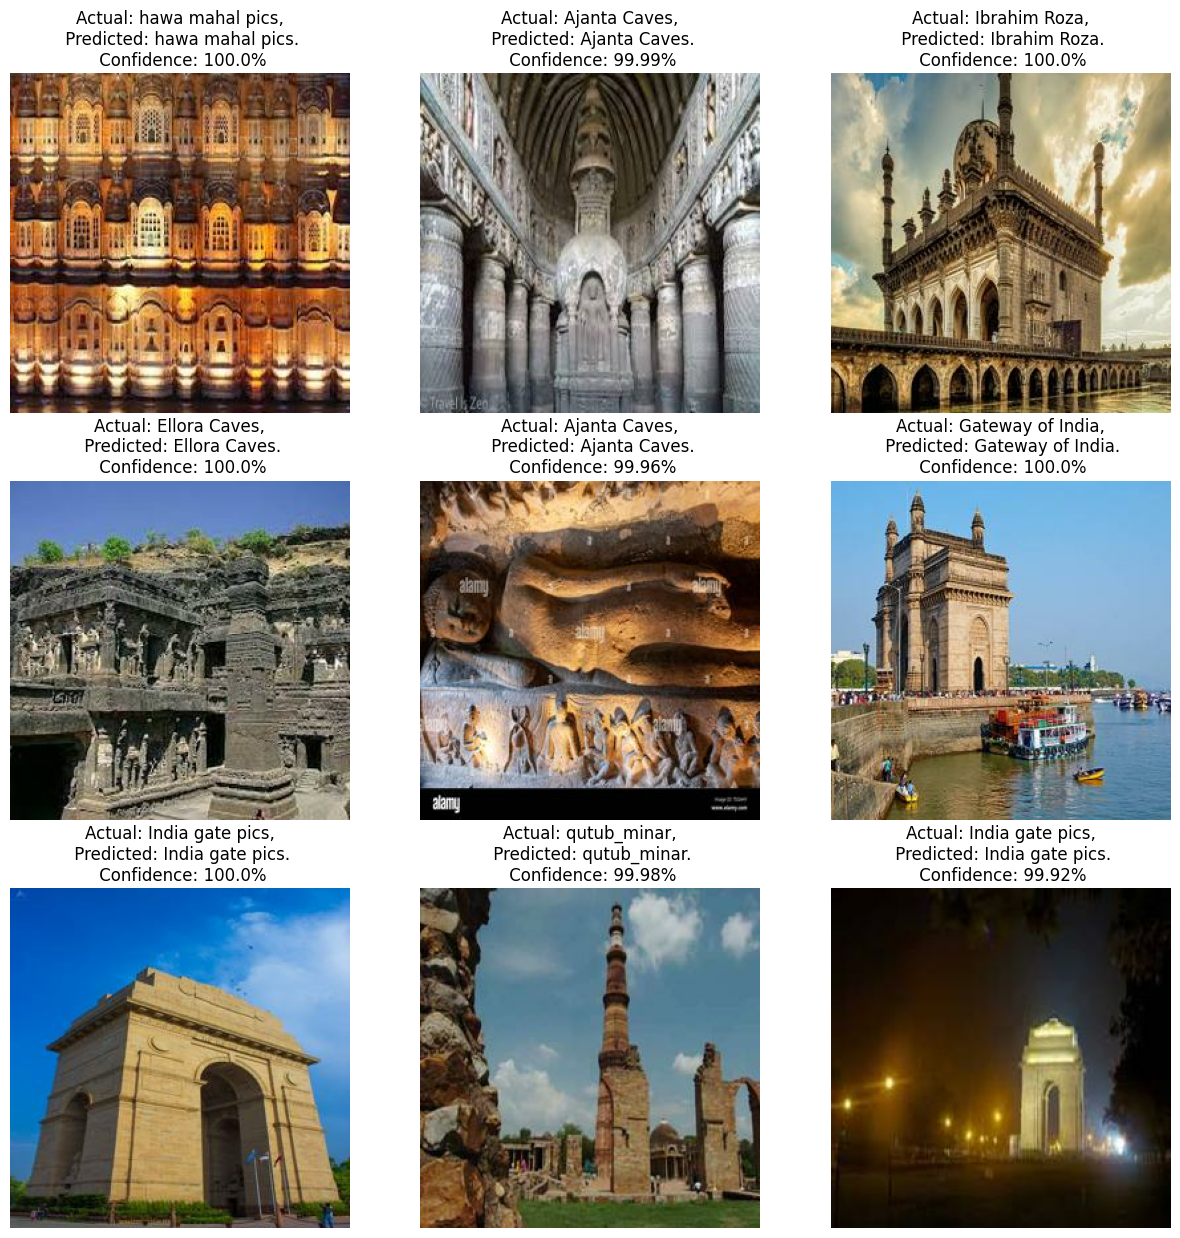

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [ ]:
import os
model_version=max([int(i) for i in os.listdir("/content/Indian-monuments/images/models") + [0]])+1
model.save(f"/content/Indian-monuments/images/models")

In [ ]:
model.save("place.h5")